# Package importation and Functions definition

In [10]:
# Package importation
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from sklearn import linear_model
import math


# Functions definition 
def toStr(x):
    x = "data/" + str(x) + ".csv"
    return(x)


# Data importation and structuration

In [14]:
FileNames = list(range(2012,2018,1))

FileNames = map(toStr,FileNames)
FileNames = list(FileNames)

dataSiata = pd.read_csv(FileNames[0])

for i in FileNames[1:len(FileNames)]:
    dataSiata = dataSiata.append(pd.read_csv(i))

sequence = list(range(0,len(dataSiata)))


# Data structure

In [16]:
# Data structure
dataSiata.head()

,fecha,pm25,pm10,ozono,nox
0,2012-07-06 11:00:00,29.0,71.0,33.0,0.0
1,2012-07-06 12:00:00,21.0,33.0,43.0,0.0
2,2012-07-06 13:00:00,20.0,76.0,59.0,0.0
3,2012-07-06 14:00:00,24.0,76.0,46.0,0.0
4,2012-07-06 15:00:00,13.0,76.0,44.0,0.0


In [17]:
# Data structure
dataSiata.tail()

,fecha,pm25,pm10,ozono,nox
2623,2017-02-28 21:00:00,13.0,20.0,11.29680,0.0000
2624,2017-02-28 22:00:00,14.0,49.0,1.88982,80.8559
2625,2017-02-28 22:00:00,17.0,25.0,1.97347,0.0000
2626,2017-02-28 23:00:00,29.0,49.0,1.83996,84.2407
2627,2017-02-28 23:00:00,18.0,28.0,1.42333,0.0000


# Time series graph

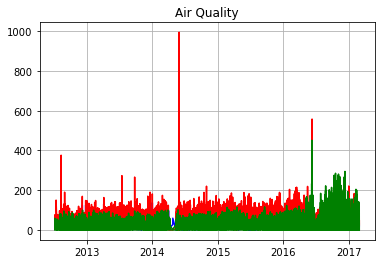

In [21]:
# plot Data

%matplotlib inline

plt.plot_date(dataSiata["fecha"],dataSiata["pm25"],fmt="r-",color = "blue")
plt.plot_date(dataSiata["fecha"],dataSiata["pm10"],fmt="r-",color = "red")
plt.plot_date(dataSiata["fecha"],dataSiata["ozono"],fmt="r-",color = "green")
plt.plot_date(dataSiata["fecha"],dataSiata["nox"],fmt="r-",color = "green")
plt.title("Air Quality")
plt.grid(True)

# Correlation estimation

In [26]:
# Pearson correlation

PC = dataSiata.corr("pearson")
PC

,pm25,pm10,ozono,nox
pm25,1.000000,0.820328,-0.057831,0.200384
pm10,0.820328,1.000000,-0.016685,0.233086
ozono,-0.057831,-0.016685,1.000000,-0.157402
nox,0.200384,0.233086,-0.157402,1.000000


In [27]:
# Spearman correlation

SC = dataSiata.corr("spearman")
SC

,pm25,pm10,ozono,nox
pm25,1.000000,0.813584,-0.142776,0.185928
pm10,0.813584,1.000000,-0.088006,0.184482
ozono,-0.142776,-0.088006,1.000000,-0.157746
nox,0.185928,0.184482,-0.157746,1.000000


# Data filter

In [29]:
# data filter
dataSiataNOX = dataSiata[dataSiata["nox"] != 0]

# Time series graph

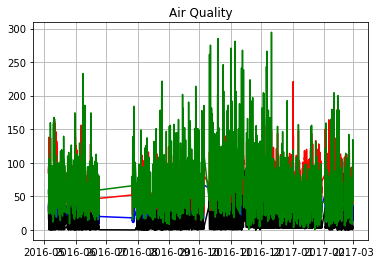

In [32]:
# plot Data
plt.plot_date(dataSiataNOX["fecha"],dataSiataNOX["pm25"],fmt="r-",color = "blue")
plt.plot_date(dataSiataNOX["fecha"],dataSiataNOX["pm10"],fmt="r-",color = "red")
plt.plot_date(dataSiataNOX["fecha"],dataSiataNOX["ozono"],fmt="r-",color = "black")
plt.plot_date(dataSiataNOX["fecha"],dataSiataNOX["nox"],fmt="r-",color = "green")
plt.title("Air Quality")
plt.grid(True)

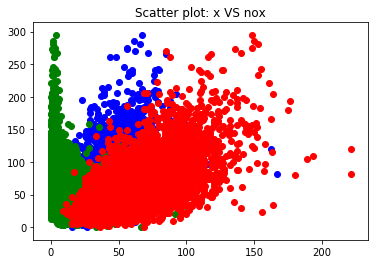

In [51]:
# Scatter plot: x VS nox
plt.scatter(dataSiataNOX["pm25"],dataSiataNOX["nox"],color = "blue")
plt.scatter(dataSiataNOX["ozono"],dataSiataNOX["nox"],color = "green")
plt.scatter(dataSiataNOX["pm10"],dataSiataNOX["nox"],color = "red")

plt.title("Scatter plot: x VS nox")

# Split data

In [36]:
# split data train

train = dataSiataNOX.iloc[0:5860]

p10Part = train["pm10"]
nox = train["nox"]

p10PartNP = np.matrix(p10Part)
noxNP = np.matrix(nox)

In [37]:
# Test
test = dataSiataNOX.iloc[5860:5882]

p10PartTest = test["pm10"]
noxTest = test["nox"]

p10PartNPTest = np.matrix(p10PartTest)
noxNPTest = np.matrix(noxTest)

# Fitting linear model

In [41]:
# Fitting linear model

lm = linear_model.LinearRegression()
fittedlm = lm.fit(p10PartNP.transpose(),noxNP.transpose())

result = [fittedlm.intercept_,fittedlm.coef_]

result

[array([ 3.34749349]), array([[ 0.93509152]])]

## Fitted model 

$NOX = 3.35 + 0.94*P10$

# Predictions

In [42]:
# predictions linear model train

noxFitted = fittedlm.predict(p10PartNP.transpose())
noxFitted = pd.DataFrame(noxFitted,columns = ["predictionNOX"])

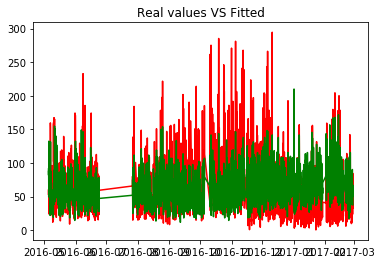

In [50]:
# Real values VS Fitted
plt.plot_date(train["fecha"],train["nox"],fmt="r-",color = "red")
plt.plot_date(train["fecha"],noxFitted["predictionNOX"],fmt="r-",color = "green")
plt.title("Real values VS Fitted")

In [47]:
# predictions linear model test
noxFittedTest = fittedlm.predict(p10PartNPTest.transpose())
noxFittedTest = pd.DataFrame(noxFittedTest,columns = ["predictionNOX"])

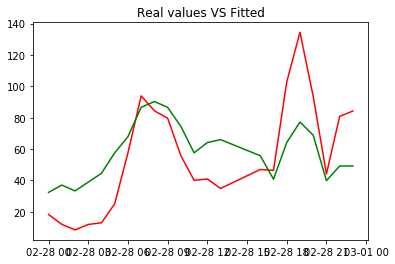

In [52]:
# Real values VS Fitted
plt.plot_date(test["fecha"],test["nox"],fmt="r-",color = "red")
plt.plot_date(test["fecha"],noxFittedTest["predictionNOX"],fmt="r-",color = "green")
plt.title("Real values VS Fitted")

# Data Transformation

In [55]:
# Log transformation train data
p10PartLog = p10Part.apply(math.log)
noxLog = nox.apply(math.log)

# Numpy matrix cast
p10PartNPLog = np.matrix(p10PartLog)
noxNPLog = np.matrix(noxLog)

In [56]:
# Log transformation test data
p10PartTestLog = p10PartTest.apply(math.log)
noxTestLog = noxTest.apply(math.log)

# Numpy matrix cast
p10PartNPTestLog = np.matrix(p10PartTestLog)
noxNPTestLog = np.matrix(noxTestLog)

# Fitting linear model

In [69]:
# Fitting linear model transformed data
fittedlmLog = lm.fit(p10PartNPLog.transpose(),noxNPLog.transpose())

result = [fittedlmLog.intercept_,fittedlmLog.coef_]

result

[array([ 0.18397458]), array([[ 0.9259149]])]

## Fitted model 

$log(NOX) = 0.18 + 0.93*log(P10)$

# Predictions

In [58]:
# predictions linear model train transformed data
noxFittedLog = fittedlmLog.predict(p10PartNPLog.transpose())
noxFittedLog = pd.DataFrame(noxFittedLog,columns = ["predictionNOX"])

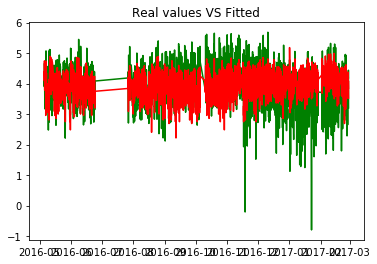

In [59]:
# Real values VS Fitted
plt.plot_date(train["fecha"],noxLog,fmt="r-",color = "green")
plt.plot_date(train["fecha"],noxFittedLog["predictionNOX"],"r-",color = "red")
plt.title("Real values VS Fitted")

In [60]:
# predictions linear model train transformed data
noxFittedTestLog = fittedlmLog.predict(p10PartNPTestLog.transpose())
noxFittedTestLog = pd.DataFrame(noxFittedTestLog,columns = ["predictionNOX"])

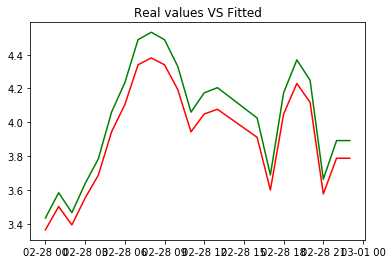

In [63]:
# Real values VS Fitted
plt.plot_date(test["fecha"],p10PartTestLog,fmt="r-",color = "green")
plt.plot_date(test["fecha"],noxFittedTestLog["predictionNOX"],"r-",color = "red")
plt.title("Real values VS Fitted")

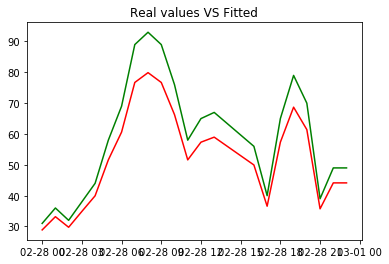

In [64]:
# Real values VS Fitted
plt.plot_date(test["fecha"],p10PartTestLog.apply(math.exp),fmt="r-",color = "green")
plt.plot_date(test["fecha"],noxFittedTestLog["predictionNOX"].apply(math.exp),"r-",color = "red")
plt.title("Real values VS Fitted")